# Machine Learning Exercise 1

### Step 1
Start By Importing The Libraries Required For The Exercise And Read In The CSV Salary File Into The DataFrame. Then, Look At The Structure Of The DataFrame To Get A Better Understanding Of The Data.

In [371]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [372]:
dfSalary = pd.read_csv('salaryData.csv')
dfSalary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [373]:
dfSalary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Step 2
Next, Perform Data Visualisation To Develop An Understanding Of The Relationship Between The Two Variables In The Dataset

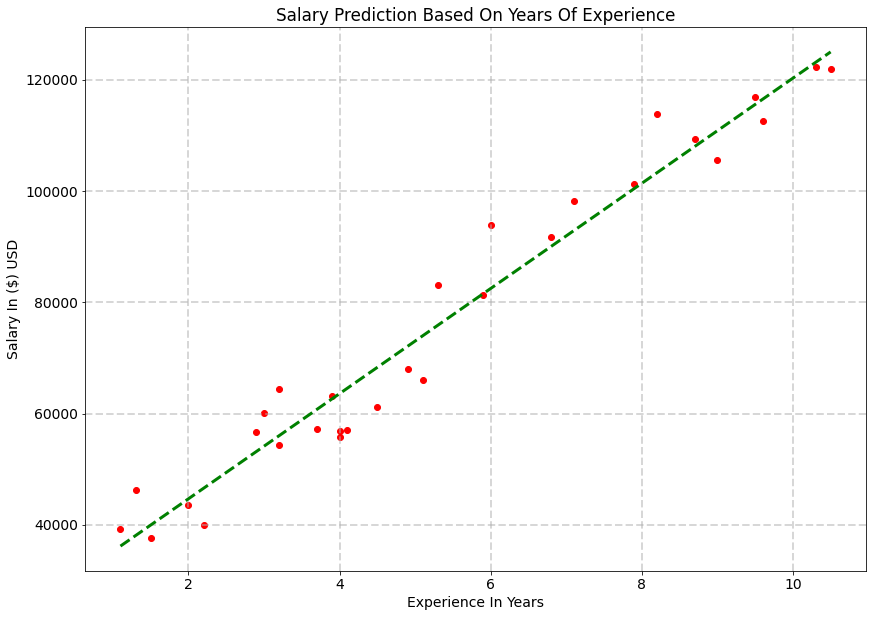

The Linear Equation For The Orginal Dataset Is: Predicted Salary = 9449.96 x (Years Of Experience) + 25792.2


In [374]:
M, C = np.polyfit(dfSalary['YearsExperience'], dfSalary['Salary'], 1)
plt.figure(figsize=(14, 10))
plt.grid(linestyle = '--', linewidth = 2, alpha=0.5)
plt.scatter(dfSalary['YearsExperience'], dfSalary['Salary'], color='r', marker='o')
plt.plot(dfSalary['YearsExperience'], M*dfSalary['YearsExperience'] + C, linestyle='--', linewidth=3, color='green')
plt.ylabel('Salary In ($) USD')
plt.xlabel('Experience In Years')
plt.title('Salary Prediction Based On Years Of Experience')
plt.rc('font', size=14)
plt.show()
print("The Linear Equation For The Orginal Dataset Is: Predicted Salary = " + str(round(M, 2)) + " x (Years Of Experience) + " + str(round(C, 2)))

### Step 3
Split The Data Into Seperate DataFrames And Then Split Those DataFrames Further Into Training And Testing Data. Then, Perform The Machine Learning On The Training Data

In [375]:
X = dfSalary.drop(columns=['Salary'])
Y = dfSalary.drop(columns=['YearsExperience'])
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.25)
trainingModel = LinearRegression()
trainingModel.fit(trainX, trainY)
predictionResults = trainingModel.predict(testX)
newPredictionResults = []
for x in predictionResults:
    for y in x:
        newPredictionResults.append(y)

### Step 4
Calculate The Linear Equation Of Your Model Using The In-Built Functions From The Libraries Imported Above. 

In [376]:
M = trainingModel.coef_
C = trainingModel.intercept_
modelGradient = 0
modelIntercept = 0
for x in M:
    for y in x:
        modelGradient = round(y, 2)
for x in C:
    modelIntercept = round(x, 2)
print("The Linear Equation For This Model Is: Predicted Salary = " + str(modelGradient) + " x (Years Of Experience) + " + str(modelIntercept))

The Linear Equation For This Model Is: Predicted Salary = 9551.96 x (Years Of Experience) + 24947.15


In [385]:
# Create A Function That Returns The Estimated Salary Based On Years of Experience Using The Linear Equation
def estimatedSalary(yrsOfExperience):
    return round(modelGradient*yrsOfExperience + modelIntercept, 2)

# Additional Testing of Model
addtionalTests = [7.2, 5.6, 3.9, 5.8, 2.6, 11, 12.5]
for x in addtionalTests:
    print("The Estimated Salary For " + str(x) + " Years Is $" + str(estimatedSalary(x)))

The Estimated Salary For 7.2 Years Is $93721.26
The Estimated Salary For 5.6 Years Is $78438.13
The Estimated Salary For 3.9 Years Is $62199.79
The Estimated Salary For 5.8 Years Is $80348.52
The Estimated Salary For 2.6 Years Is $49782.25
The Estimated Salary For 11 Years Is $130018.71
The Estimated Salary For 12.5 Years Is $144346.65


### Step 5
Finally, Calculate The $R^{2} Score$ Of Your Model Using The In-Built Functions From The Imported Libraries

In [386]:
print("This Model Has An R2 Score Of: ", round(r2_score(testY, predictionResults), 2))

This Model Has An R2 Score Of:  0.95


### Evaluation
Document Your Findings And What The $R^{2} Score$ Tells About The Accuracy Of Your Model

Using Machine Learning, I Was Able To Devise A Model That Can Predict The Salary In USD Of An Individual Based On Their Years Of Experience. Since My Model Has An $R^{2} Score$ Of 0.95 Hence Close To 1.0, This Means That This Model Is Able To Predict The Salary Very Well Which Is Also Evident With The Linear Equation From The Original Dataset And After Applying Machine Learning Being Similar.